<a href="https://colab.research.google.com/github/brnocorreia/HTRU-machinelearning/blob/main/HTRUv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np # array and vector manipulation
import pandas as pd # data manipulation

import seaborn as sns
from matplotlib.cbook import boxplot_stats
import matplotlib.pyplot as plt

from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from joblib import Parallel, delayed
import multiprocessing as mp

In [31]:
# Lendo e tratando o dataset

data = pd.read_csv('/content/HTRU_2.csv')
data.columns = ['Mean IP', 'Standard Deviation IP', 'Excess Kurtosis IP', 'Skewness IP', 'Mean Curve','Standard Deviation Curve','Excess Kurtosis Curve', 'Skewness Curve', 'Class']
data

,Mean IP,Standard Deviation IP,Excess Kurtosis IP,Skewness IP,Mean Curve,Standard Deviation Curve,Excess Kurtosis Curve,Skewness Curve,Class
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
...,...,...,...,...,...,...,...,...,...
17892,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17893,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17894,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17895,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [32]:
# Normalizando os dados

obj_normalizado = MinMaxScaler().fit(data)
data_norm = obj_normalizado.transform(data)
data_norm = pd.DataFrame(data_norm)

data_norm.columns = ['Mean IP', 'Standard Deviation IP', 'Excess Kurtosis IP', 'Skewness IP', 'Mean Curve','Standard Deviation Curve','Excess Kurtosis Curve', 'Skewness Curve', 'Class']

data_norm.head()

,Mean IP,Standard Deviation IP,Excess Kurtosis IP,Skewness IP,Mean Curve,Standard Deviation Curve,Excess Kurtosis Curve,Skewness Curve,Class
0,0.517628,0.460908,0.235415,0.018268,0.006560,0.072524,0.364015,0.108443,0.0
1,0.520346,0.196868,0.221138,0.040677,0.013030,0.139188,0.288624,0.054610,0.0
2,0.700933,0.437884,0.181750,0.016534,0.015368,0.131583,0.266348,0.046581,0.0
3,0.443854,0.214847,0.249044,0.041712,0.004327,0.039684,0.462029,0.213369,0.0
4,0.469784,0.296271,0.242110,0.031600,0.006376,0.069473,0.365216,0.111797,0.0


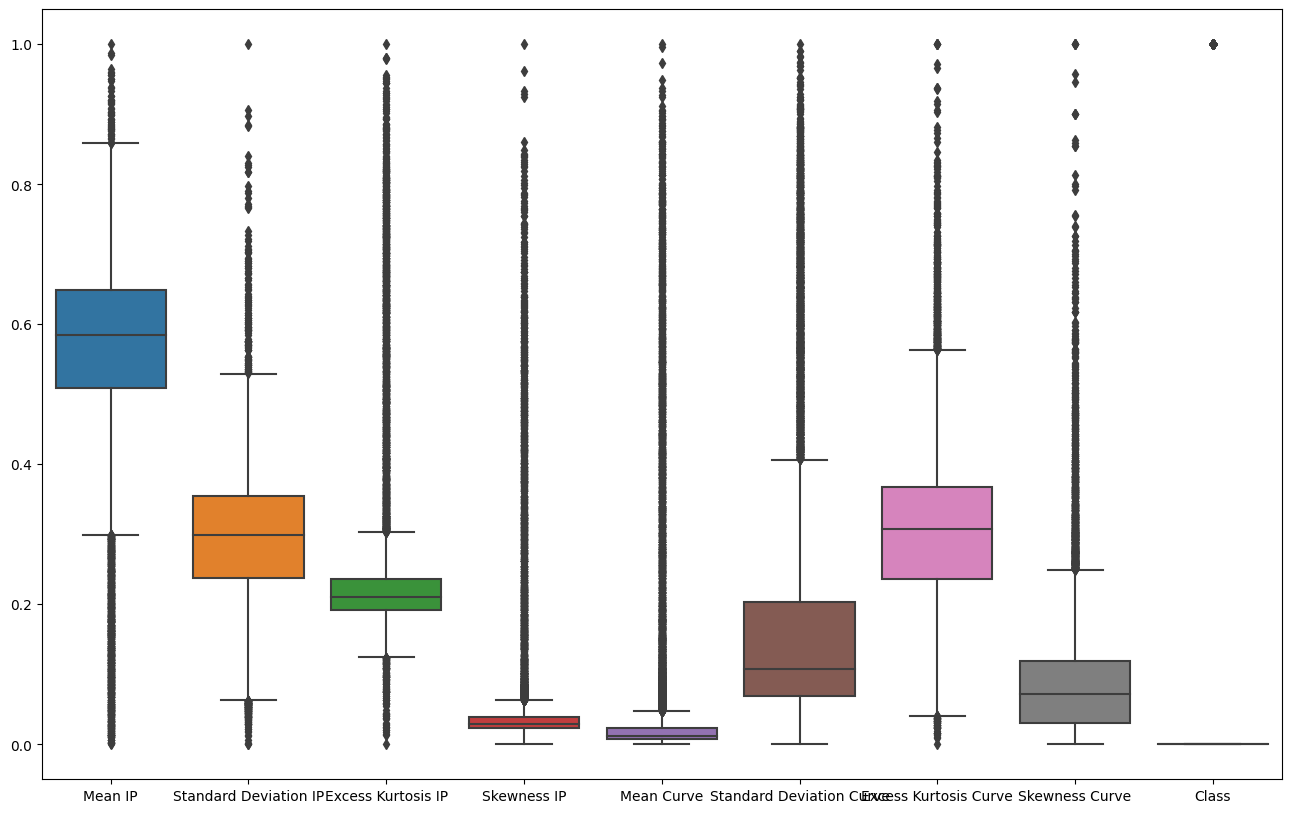

In [33]:
# Plotando o boxplot após normalização

plt.figure(figsize=(16,10))
ax = sns.boxplot(data = data_norm)

In [34]:
# Formando o dataset 50/50

dataset_2 = data.loc[data['Class'] == 0]
dataset_3 = data.loc[data['Class'] == 1]
dataset_2_serializado = dataset_2.sample(n = 1639)
dataset_5050 = pd.concat([dataset_2_serializado, dataset_3])
dataset_5050_norm = obj_normalizado.transform(dataset_5050)
data_5050 = pd.DataFrame(dataset_5050_norm)

data_5050.columns = ['Mean IP', 'Standard Deviation IP', 'Excess Kurtosis IP', 'Skewness IP', 'Mean Curve','Standard Deviation Curve','Excess Kurtosis Curve', 'Skewness Curve', 'Class']
data_5050

,Mean IP,Standard Deviation IP,Excess Kurtosis IP,Skewness IP,Mean Curve,Standard Deviation Curve,Excess Kurtosis Curve,Skewness Curve,Class
0,0.636611,0.356475,0.198687,0.021135,0.008916,0.106230,0.339091,0.084695,0.0
1,0.633014,0.313287,0.201427,0.024011,0.009756,0.071869,0.336979,0.099772,0.0
2,0.547070,0.214216,0.205926,0.036717,0.022685,0.169953,0.224762,0.027258,0.0
3,0.826482,0.308151,0.157718,0.023788,0.262245,0.748062,0.103635,0.000511,0.0
4,0.598511,0.310990,0.213758,0.028527,0.008838,0.101042,0.337863,0.086002,0.0
...,...,...,...,...,...,...,...,...,...
3273,0.449960,0.306867,0.348633,0.061478,0.002465,0.048640,0.559462,0.281547,1.0
3274,0.113630,0.121376,0.669158,0.401285,0.580926,0.691815,0.074067,0.000908,1.0
3275,0.381456,0.192260,0.378103,0.116807,0.171631,0.565214,0.125501,0.002735,1.0
3276,0.120781,0.038878,0.829848,0.682981,0.634680,0.731299,0.070650,0.000762,1.0


In [35]:
#Formando o dataset 60/40

dataset_4 = data.loc[data['Class'] == 0]
dataset_5 = data.loc[data['Class'] == 1]
dataset_4_serializado = dataset_4.sample(n = 2459)
dataset_6040 = pd.concat([dataset_4_serializado, dataset_5])
dataset_6040_norm = obj_normalizado.transform(dataset_6040)
data_6040 = pd.DataFrame(dataset_6040_norm)

data_6040.columns = ['Mean IP', 'Standard Deviation IP', 'Excess Kurtosis IP', 'Skewness IP', 'Mean Curve','Standard Deviation Curve','Excess Kurtosis Curve', 'Skewness Curve', 'Class']
data_6040

,Mean IP,Standard Deviation IP,Excess Kurtosis IP,Skewness IP,Mean Curve,Standard Deviation Curve,Excess Kurtosis Curve,Skewness Curve,Class
0,0.515871,0.162562,0.214719,0.050928,0.015383,0.147727,0.275096,0.048187,0.0
1,0.658776,0.351347,0.169123,0.027384,0.010984,0.086156,0.316283,0.082968,0.0
2,0.371586,0.123170,0.303675,0.094242,0.025172,0.215688,0.227736,0.027009,0.0
3,0.441930,0.296872,0.262002,0.041498,0.015742,0.138146,0.258855,0.041471,0.0
4,0.599599,0.452961,0.201307,0.017904,0.015993,0.176020,0.278254,0.048025,0.0
...,...,...,...,...,...,...,...,...,...
4093,0.449960,0.306867,0.348633,0.061478,0.002465,0.048640,0.559462,0.281547,1.0
4094,0.113630,0.121376,0.669158,0.401285,0.580926,0.691815,0.074067,0.000908,1.0
4095,0.381456,0.192260,0.378103,0.116807,0.171631,0.565214,0.125501,0.002735,1.0
4096,0.120781,0.038878,0.829848,0.682981,0.634680,0.731299,0.070650,0.000762,1.0


In [36]:
#Formando o dataset 70/30

dataset_6 = data.loc[data['Class'] == 0]
dataset_7 = data.loc[data['Class'] == 1]
dataset_6_serializado = dataset_6.sample(n = 3825)
dataset_7030 = pd.concat([dataset_6_serializado, dataset_7])
dataset_7030_norm = obj_normalizado.transform(dataset_7030)
data_7030 = pd.DataFrame(dataset_7030_norm)

data_7030.columns = ['Mean IP', 'Standard Deviation IP', 'Excess Kurtosis IP', 'Skewness IP', 'Mean Curve','Standard Deviation Curve','Excess Kurtosis Curve', 'Skewness Curve', 'Class']
data_7030

,Mean IP,Standard Deviation IP,Excess Kurtosis IP,Skewness IP,Mean Curve,Standard Deviation Curve,Excess Kurtosis Curve,Skewness Curve,Class
0,0.624399,0.254792,0.194448,0.029937,0.004552,0.055446,0.434815,0.167626,0.0
1,0.681109,0.388625,0.186064,0.021730,0.048748,0.336993,0.193631,0.015502,0.0
2,0.624064,0.304122,0.204214,0.025054,0.007894,0.062926,0.343652,0.106259,0.0
3,0.564677,0.246908,0.223882,0.030825,0.011232,0.085082,0.292043,0.067325,0.0
4,0.641671,0.314374,0.190124,0.025010,0.025547,0.192966,0.221069,0.026246,0.0
...,...,...,...,...,...,...,...,...,...
5459,0.449960,0.306867,0.348633,0.061478,0.002465,0.048640,0.559462,0.281547,1.0
5460,0.113630,0.121376,0.669158,0.401285,0.580926,0.691815,0.074067,0.000908,1.0
5461,0.381456,0.192260,0.378103,0.116807,0.171631,0.565214,0.125501,0.002735,1.0
5462,0.120781,0.038878,0.829848,0.682981,0.634680,0.731299,0.070650,0.000762,1.0


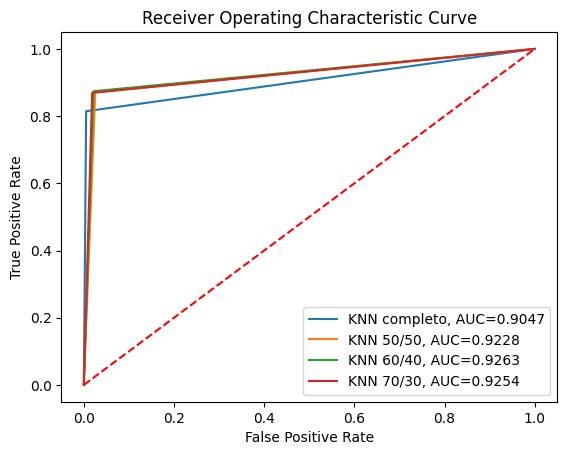

In [37]:
# Fit KNN do dataset completo

y = data_norm['Class']
data_norm = data_norm.drop(['Class'], axis = 1)
X_train,X_test,y_train,y_test = train_test_split(data_norm, y, test_size=0.25)
clf = KNeighborsClassifier(n_neighbors = 4)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="KNN completo, AUC="+str(auc))

#Fit KNN do dataset 50/50

y = data_5050['Class']
data_5050 = data_5050.drop(['Class'], axis = 1)
X_train,X_test,y_train,y_test = train_test_split(data_5050, y, test_size=0.25)
clf = KNeighborsClassifier(n_neighbors = 4)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="KNN 50/50, AUC="+str(auc))

#Fit KNN do dataset 60/40

y = data_6040['Class']
data_6040 = data_6040.drop(['Class'], axis = 1)
X_train,X_test,y_train,y_test = train_test_split(data_6040, y, test_size=0.25)
clf = KNeighborsClassifier(n_neighbors = 4)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="KNN 60/40, AUC="+str(auc))

#Fit KNN do dataset 70/30

y = data_7030['Class']
data_7030 = data_7030.drop(['Class'], axis = 1)
X_train,X_test,y_train,y_test = train_test_split(data_7030, y, test_size=0.25)
clf = KNeighborsClassifier(n_neighbors = 4)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="KNN 70/30, AUC="+str(auc))

#add legend
plt.legend()
plt.title('Receiver Operating Characteristic Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')


In [38]:
# # # Fit Tree do dataset completo

# y = data_norm['Class']
# data_norm = data_norm.drop(['Class'], axis = 1)
# X_train,X_test,y_train,y_test = train_test_split(data_norm, y, test_size=0.25)
# clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 2)
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
# fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
# auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
# plt.plot(fpr,tpr,label="Tree completo, AUC="+str(auc))

# #Fit Tree do dataset 50/50

# y = data_5050['Class']
# data_5050 = data_5050.drop(['Class'], axis = 1)
# X_train,X_test,y_train,y_test = train_test_split(data_5050, y, test_size=0.25)
# clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 2)
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
# fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
# auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
# plt.plot(fpr,tpr,label="Tree 50/50, AUC="+str(auc))

# #Fit Tree do dataset 60/40

# y = data_6040['Class']
# data_6040 = data_6040.drop(['Class'], axis = 1)
# X_train,X_test,y_train,y_test = train_test_split(data_6040, y, test_size=0.25)
# clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 2)
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
# fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
# auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
# plt.plot(fpr,tpr,label="Tree 60/40, AUC="+str(auc))

# #Fit Tree do dataset 70/30

# y = data_7030['Class']
# data_7030 = data_7030.drop(['Class'], axis = 1)
# X_train,X_test,y_train,y_test = train_test_split(data_7030, y, test_size=0.25)
# clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 2)
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
# fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
# auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
# plt.plot(fpr,tpr,label="Tree 70/30, AUC="+str(auc))

# #add legend
# plt.legend()
# plt.title('Receiver Operating Characteristic Curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.plot([0, 1], [0, 1], color='red', linestyle='--')